# Ford GoBike System Data Dataset Exploration
## by Ahmed Atta

## Preliminary Wrangling

> The Dataset in this analysis report are for Bike sharing system in San Franseco, The dataset is at February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
sf_df = pd.read_csv('201902-fordgobike-tripdata.csv')
sf_df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#drop the null values in the dataframe
sf_df.dropna(inplace=True)
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [5]:
#let's change start_time and end_time datatype to datetime 
sf_df['start_time'] = pd.to_datetime(sf_df['start_time'])
sf_df['end_time'] = pd.to_datetime(sf_df['end_time'])
#change the start_station_id and end_station_id from float to int 
sf_df['start_station_id'] = sf_df['start_station_id'].astype(int)
sf_df['end_station_id'] = sf_df['end_station_id'].astype(int)
sf_df['member_birth_year'] = sf_df['member_birth_year'].astype(int)
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

Let's create a day of week column from the start_time datetime column

In [6]:
sf_df['day_of_week'] = sf_df['start_time'].dt.day_name()
sf_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thursday


In [7]:
sf_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


It looks there are some wrong data on the member_birth_year column

In [8]:
a = np.sort(sf_df.member_birth_year.unique())
a

array([1878, 1900, 1901, 1902, 1910, 1920, 1927, 1928, 1930, 1931, 1933,
       1934, 1938, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001])

The records for members older than 100 seems ambigious , let's fix that

In [9]:
sf_df= sf_df[sf_df['member_birth_year'] > 1910]
np.sort(sf_df.member_birth_year.unique())

array([1920, 1927, 1928, 1930, 1931, 1933, 1934, 1938, 1939, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001])

In [10]:
#change duration column to present minutes instead of seconds
sf_df['duration_sec'] = sf_df['duration_sec']/60

In [11]:
sf_df.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [12]:
sf_df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [13]:
sf_df.start_time.max(),sf_df.start_time.min()

(Timestamp('2019-02-28 23:59:18.548000'),
 Timestamp('2019-02-01 00:00:20.636000'))

In [14]:
sf_df.rename(columns={'duration_sec' : 'duration'},inplace=True)

In [15]:
sf_df.sample(5)

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week
97655,12.750000,2019-02-15 08:39:16.307,2019-02-15 08:52:01.791,370,Jones St at Post St,37.787327,-122.413278,11,Davis St at Jackson St,37.797280,-122.398436,5749,Subscriber,1989,Male,No,Friday
5761,8.183333,2019-02-28 12:12:41.557,2019-02-28 12:20:53.402,363,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5958,Subscriber,1973,Male,No,Thursday
124113,5.666667,2019-02-11 08:50:54.716,2019-02-11 08:56:35.710,238,MLK Jr Way at University Ave,37.871719,-122.273068,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,5209,Subscriber,1982,Male,No,Monday
20898,1.883333,2019-02-26 10:14:19.949,2019-02-26 10:16:13.660,16,Steuart St at Market St,37.794130,-122.394430,23,The Embarcadero at Steuart St,37.791464,-122.391034,6597,Subscriber,1982,Male,No,Tuesday
40162,21.966667,2019-02-22 21:50:38.917,2019-02-22 22:12:37.310,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,61,Howard St at 8th St,37.776513,-122.411306,5930,Subscriber,1983,Male,Yes,Friday


The dataset of San Francrso looks ready for exploratory analysis

### What is the structure of your dataset?

> There are 174880 records for Bike sharing system in San Francesco ,With 17 features(duration ,start time ,end time ,start station id ,start station name, start station latitude ,start station longitude , end station id, end station name , end station latitude ,end station longitude , bike id , user type, member birth year ,member gender) most of them are numeric while station names are strings and gender , user type ,day of week are nominal categories and ordered as :
* Member gender : Male , Female , Other
* User Type : Customer , Subscriber

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in finding out different factors affecting using rate of bikes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think The bikes use rate will be different through weekdays and age of the users as i expect the a high rate during weekends and among youth users , while i do n't think gender will not have much effect on using rate

## Univariate Exploration

> Let's investigate distributions of our main variable the Bike Riding Duration in minutes 

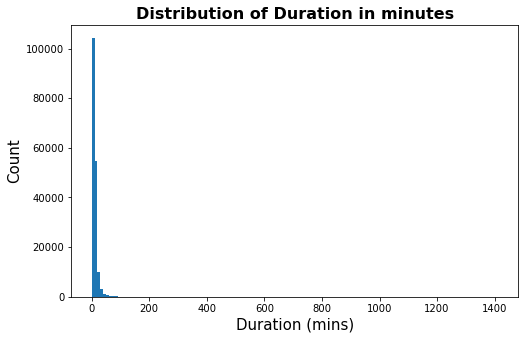

In [227]:
binsize = 10
bins = np.arange(0,sf_df['duration'].max()+binsize , binsize)
plt.figure(figsize=[8, 5])
plt.hist(data= sf_df , x = 'duration',bins = bins);
plt.title('Distribution of Duration in minutes',fontsize=16 , weight='bold')
plt.xlabel('Duration (mins)',fontsize=15)
plt.ylabel('Count',fontsize=15);

The Duration is very skewed to the right and has a long tail as Most common Usage duration is very small while very little people take long bike sharing durations

In [28]:
np.log10(sf_df.duration.describe())

count    5.242740
mean     1.069435
std      1.437358
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration, dtype: float64

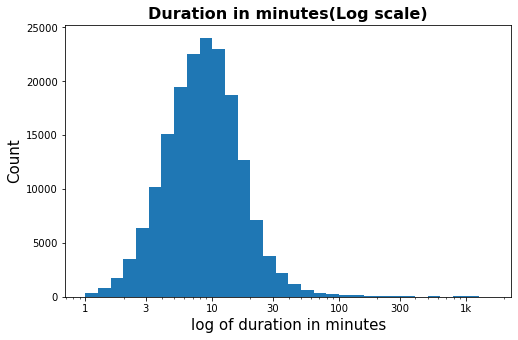

In [226]:
logbinsize = 0.1
logbins = 10 ** np.arange(0,np.log10(sf_df['duration'].max())+logbinsize , logbinsize)
plt.figure(figsize=[8, 5])
plt.hist(data= sf_df , x = 'duration',bins = logbins)
plt.xscale('log')
plt.xticks([1,3,10,30,100,300,1000],[1,3,10,30,100,300,'1k'])

plt.title('Duration in minutes(Log scale)',fontsize=16 , weight='bold')
plt.xlabel('log of duration in minutes',fontsize=15)
plt.ylabel('Count',fontsize=15);

After making Log scale transformation the duration distribution looks normal with bell shape curve with largest peak at 10

### How long do users usually ride bike?

>#### Most of bike users do not exceed 100 minutes and take only about 10 minutes on average.

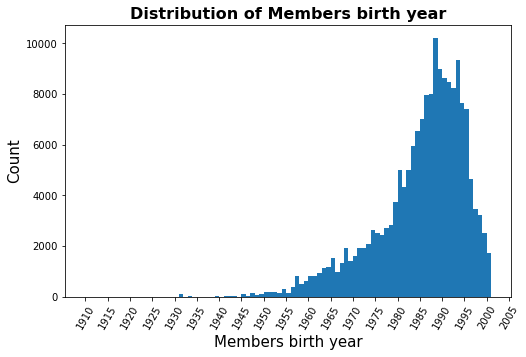

In [228]:
bins = np.arange(1910,sf_df['member_birth_year'].max()+1 , 1)
ticks = np.arange(1910,sf_df['member_birth_year'].max()+5,5)
plt.figure(figsize=[8, 5])
plt.hist(data= sf_df , x = 'member_birth_year',bins=bins)
plt.xticks(ticks,rotation=60)
plt.xlabel('Members birth year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Distribution of Members birth year',fontsize=16 ,weight= 'bold');

From the graph we can see that the majority of bike users are born after 1980 while the number decreases as people get older

### How old are most of the users?
>#### The majority of the users are born after 1980 , while the users number decrease as users get older

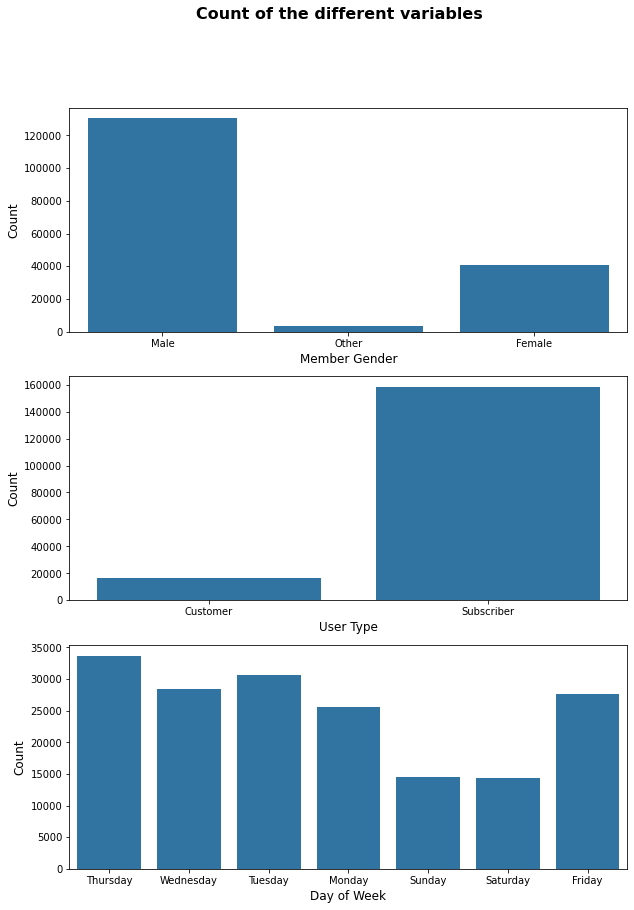

In [282]:
#Let's plot the count of the three categorical variables gender,user_type and day_of_week together in one plot
fig, ax = plt.subplots(nrows=3, figsize = [10,14])

#let's make a base color to avoid multicolor distraction
base_color = sb.color_palette()[0]

# i am going to use 3 countplots one for each variable
ax1= sb.countplot(data = sf_df, x = 'member_gender', color = base_color, ax = ax[0])
ax1.set_xlabel('Member Gender',fontsize=12)
ax1.set_ylabel('Count',fontsize=12)

ax2 =sb.countplot(data = sf_df, x = 'user_type', color = base_color, ax = ax[1])
ax2.set_xlabel('User Type',fontsize=12)
ax2.set_ylabel('Count',fontsize=12)

ax3 = sb.countplot(data = sf_df, x = 'day_of_week', color = base_color, ax = ax[2])
ax3.set_xlabel('Day of Week',fontsize=12)
ax3.set_ylabel('Count',fontsize=12)

fig.suptitle('Count of the different variables',fontsize=16, weight='bold')

plt.show()

The plots show that males use bikes more than females by more than double , and also Subscribers are the most users while Customers are very little .
And shockingly against my expectation users ride bikes the least at weekends while they prefer to user bikes on Thursday and Tuesday the most.

### Do certain members gender use bikes more than the other?
>#### Most of the bike riders are males followed by females and users who are defined as other.


### What User type use bikes more?
>#### Subscriber Users are the most users while customer users are very little.


### Is bike using rate more on certain days of the week?
>#### Bikes are used less on Sunday and Saturday , while they are used the most on Thusrday and Tuesday

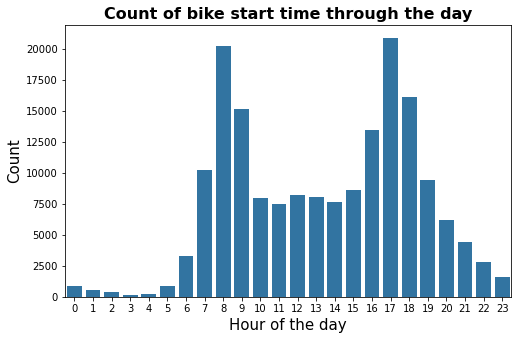

In [236]:
#Now it is time to investigate if users prefer some time of the day
plt.figure(figsize=[8, 5])
sb.countplot(data= sf_df , x = sf_df['start_time'].dt.hour,color=base_color)
plt.xlabel('Hour of the day',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Count of bike start time through the day',fontsize=16, weight='bold');

It looks users prefer using bikes around 8 and 9 in the morning , and 5 and 6 at night

### At what time of the day users ride bikes the most?
>#### User who start riding bike at 8 to 9 am and 5 to 6 pm are the most , while Using Bikes are very little from 12 am to 5 am.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Duration Variable has a long range of values from 1 minute upto 23 hours with most records has small duration values so the plot looked right skwed with long tail so i made a log scale transformation to see the duration log which looked noramlly distributed with maximum value at 10.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the dataset i noticed users of birth year on the 19th century which is odd and some records with null values so i removed the rows with these values, and i changed the datatype of start and end time to datetime to facilitate analyzing the data and extract day of week amd hour of day .


## Bivariate Exploration

> I want to investigate the relation between the duration and other variables to see what affect the duration of bike usage 

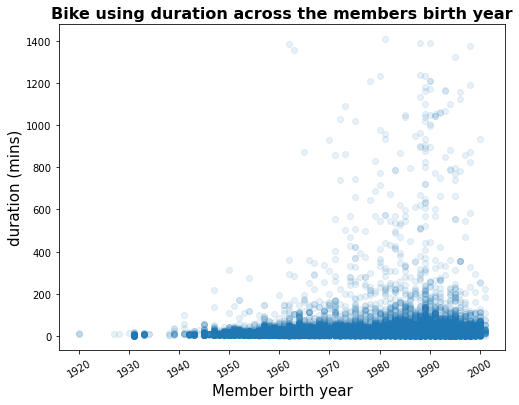

In [245]:
#at first let's check the relation between birth year and using duration to check if members of certain age are more favored
plt.figure(figsize = [8, 6])
plt.scatter(data = sf_df, x = 'member_birth_year', y = 'duration',alpha=0.1)
plt.xlabel('Member birth year',fontsize=15)
plt.ylabel('duration (mins)',fontsize=15)
plt.title('Bike using duration across the members birth year',fontsize=16, weight='bold')
plt.xticks(rotation=30);

We can focus on the users who use bikes less than 3 hours as they are the majority of them

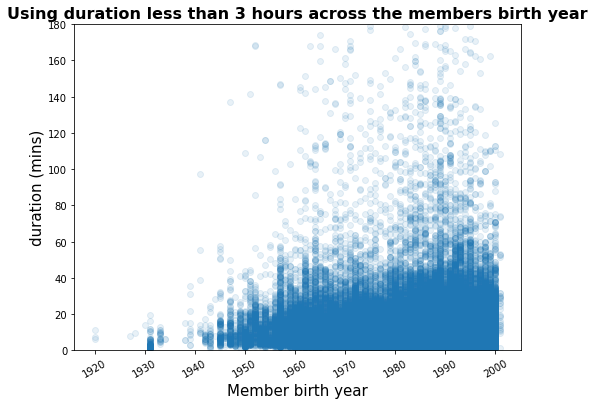

In [244]:
plt.figure(figsize = [8, 6])
plt.scatter(data = sf_df, x = 'member_birth_year', y = 'duration',alpha=0.1)
plt.ylim(0,180)
plt.xlabel('Member birth year',fontsize=15)
plt.ylabel('duration (mins)',fontsize=15)
plt.xticks(rotation=30)
plt.title('Using duration less than 3 hours across the members birth year',fontsize=16, weight='bold');

Most of users do not exceed 1 hour , while some users born between 1965 and 2000 uses the bikes for longer time

### How old are bike users who ride for the longest durations?
> #### Members born after 1965 use bikes for longer durations than others.

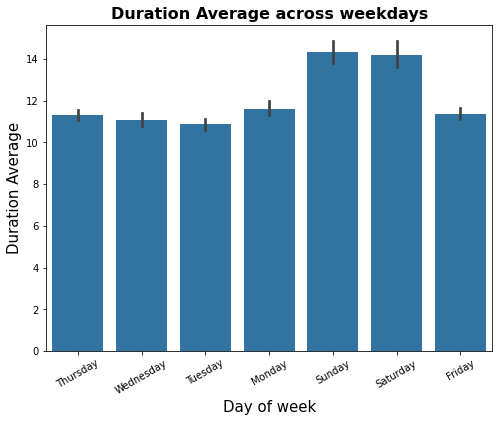

In [243]:
# not let;s see the impact of weekdays on using duration
plt.figure(figsize = [8, 6])
sb.barplot(x=sf_df['day_of_week'],y=sf_df['duration'], color = base_color)
plt.xticks(rotation=30)
plt.ylabel('Duration Average',fontsize=15)
plt.xlabel('Day of week',fontsize=15)
plt.title('Duration Average across weekdays',fontsize=16, weight='bold');

### At what day of the week users ride bikes for longer durations?
>#### While the count of records on Weekends are lower than other weekdays as shown before , the duration average is higher on Sunday and saturday

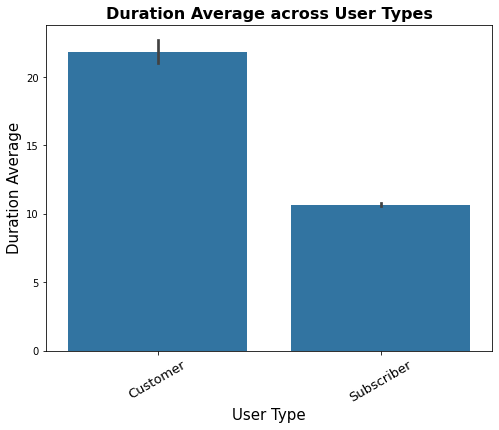

In [247]:
#Now i want to see if one of the user types use bikes for longer duration the the other
plt.figure(figsize = [8, 6])
sb.barplot(x=sf_df['user_type'],y=sf_df['duration'], color = base_color)
plt.xticks(rotation=30,fontsize=13)
plt.ylabel('Duration Average',fontsize=15)
plt.xlabel('User Type',fontsize=15)
plt.title('Duration Average across User Types',fontsize=16, weight='bold');

I want to make further exploration for the user type and weekday against Log of duration 
to see if it is different than the previous plot

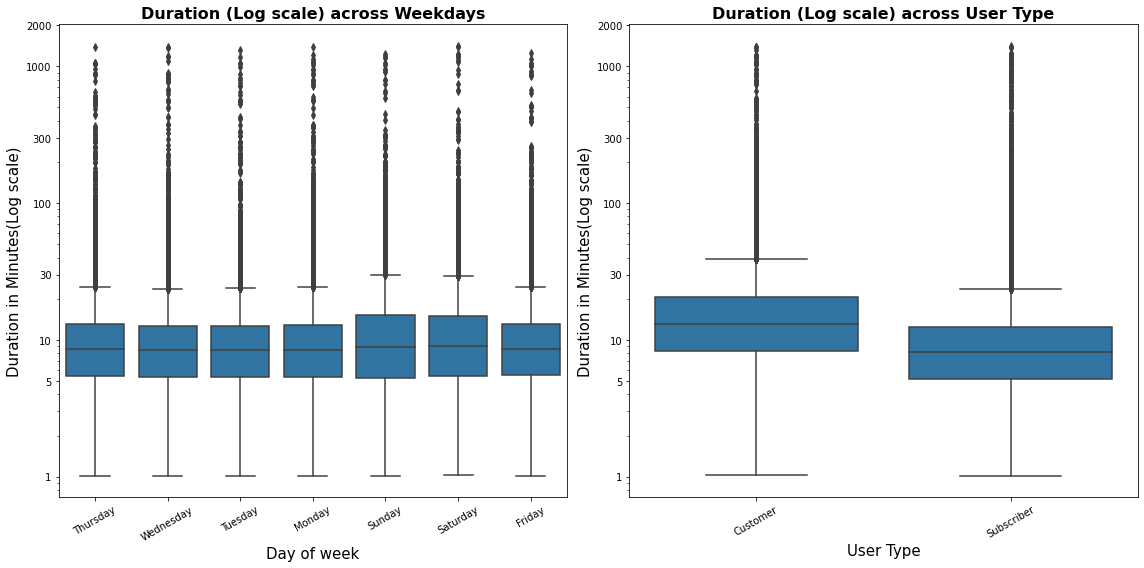

In [279]:
fig, ax = plt.subplots(ncols = 1, nrows = 2 , figsize = [16,8])

y_ticks=[1,5,10,30,100,300,1000,2000]

plt.subplot(1, 2, 1)
ax1= sb.boxplot(data = sf_df, x = 'day_of_week', y = 'duration',
               color = base_color);
plt.yscale('log')
plt.ylabel('Duration in Minutes(Log scale)',fontsize=15)
plt.xlabel('Day of week',fontsize=15)
plt.title('Duration (Log scale) across Weekdays',fontsize=16, weight='bold');
plt.xticks(rotation=30)
plt.yticks(y_ticks,y_ticks);

plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data = sf_df, x = 'user_type', y = 'duration',
               color = base_color);

plt.yscale('log')
plt.title('Duration (Log scale) across User Type',fontsize=16, weight='bold');
plt.ylabel('Duration in Minutes(Log scale)',fontsize=15)
plt.xlabel('User Type',fontsize=15)
plt.xticks(rotation=30)
plt.yticks(y_ticks,y_ticks)

plt.tight_layout();

In this Boxplot for User Type against Log of duration The result is similar with Customer users using bikes for longer durations. and also for the day of week against log of duration people used bikes for little longer durations on weekends than other weekdays

### Which user type ride bike for longer durations?
>#### Although Subscriber users are the most users but they tend to use bikes on less durations about 10 minutes on average Customer users take the bikes for more than 20 minutes on average.

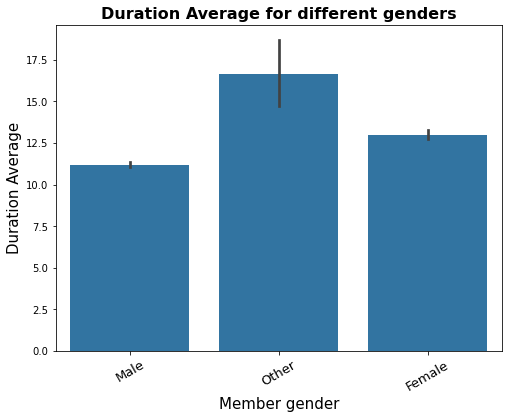

In [254]:
#Let's explore the users gender against duration average
plt.figure(figsize = [8, 6])
sb.barplot(x=sf_df['member_gender'],y=sf_df['duration'], color = base_color)
plt.xticks(rotation=30,fontsize=13)
plt.ylabel('Duration Average',fontsize=15)
plt.xlabel('Member gender',fontsize=15)
plt.title('Duration Average for different genders',fontsize=16, weight='bold');

### Is the duration different for different members gender?
>#### While Males are the most users but they take the bikes for only 10 minutes on average , and females take a little longer but users who defined themselves as other use the bikes longer than 15 minutes on average

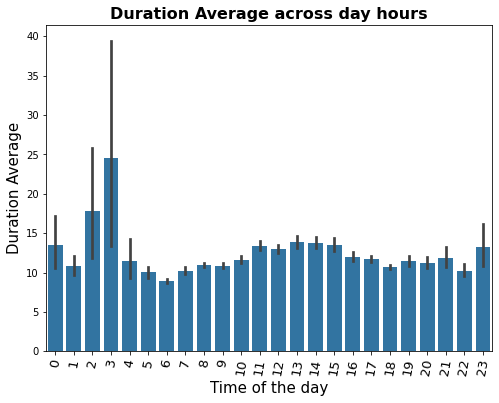

In [259]:
#let's see if people use bike more on certain time of the day
plt.figure(figsize = [8, 6])
sb.barplot(x=sf_df['start_time'].dt.hour,y=sf_df['duration'], color = base_color)
plt.xticks(rotation=80,fontsize=13)
plt.ylabel('Duration Average',fontsize=15)
plt.xlabel('Time of the day',fontsize=15)
plt.title('Duration Average across day hours',fontsize=16, weight='bold');

### At what time of the day users start riding bikes for longer durations?
>#### Users who prefer to start using Bikes on 3 and 2 am take longer than others while users who start at 6 am ride for the shortest duration.

Now I want to explore the relation between categorical variables

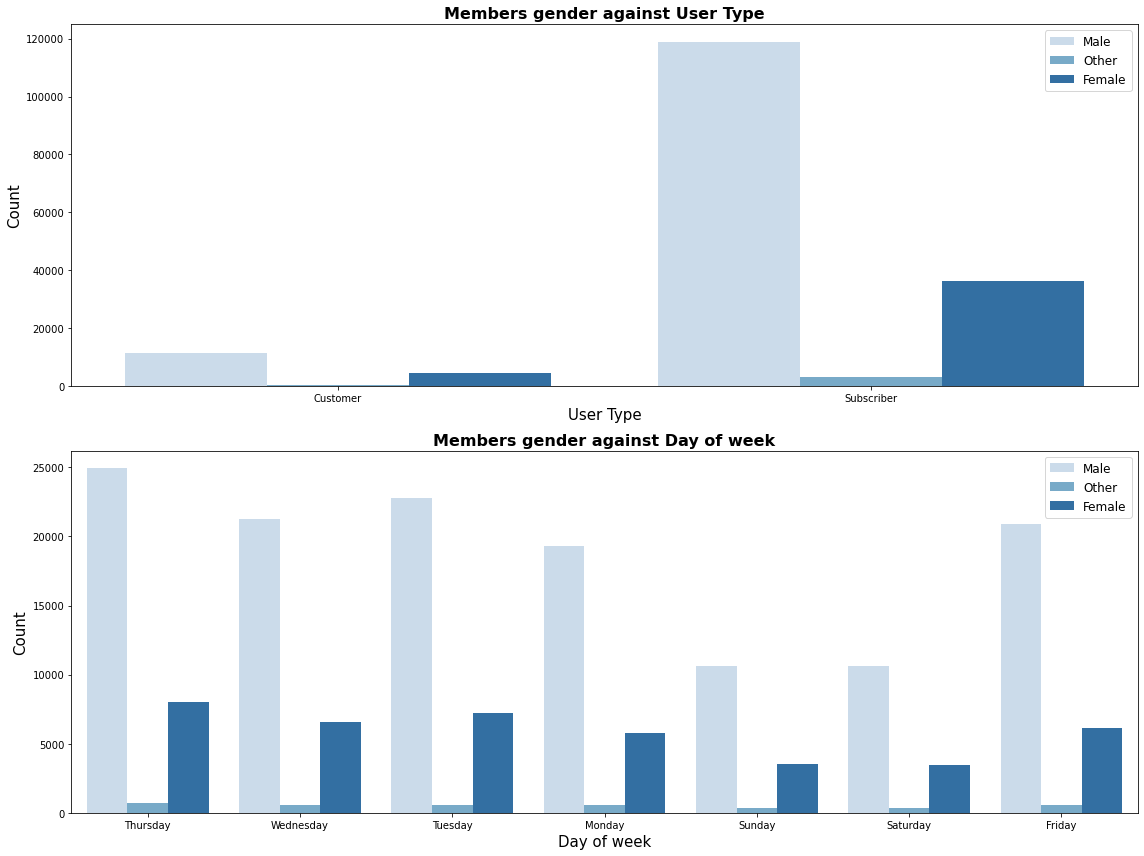

In [296]:
#Now let's see if the members gender and members type are somehow related
fig ,ax = plt.subplots(figsize = [16, 12])

plt.subplot(2, 1, 1)
ax1 = sb.countplot(data = sf_df, x = 'user_type', hue = 'member_gender', palette = 'Blues')
ax1.set_ylabel('Count',fontsize=15)
ax1.set_xlabel('User Type',fontsize=15)
ax1.set_title('Members gender against User Type',fontsize=16, weight='bold')
ax1.legend(loc='upper right',prop={'size': 12})

plt.subplot(2, 1, 2)
ax2 = sb.countplot(data = sf_df, x = 'day_of_week', hue = 'member_gender', palette = 'Blues')
ax2.set_ylabel('Count',fontsize=15)
ax2.set_xlabel('Day of week',fontsize=15)
ax2.set_title('Members gender against Day of week',fontsize=16, weight='bold')
ax2.legend(loc='upper right',prop={'size': 12})
plt.tight_layout()

plt.show()

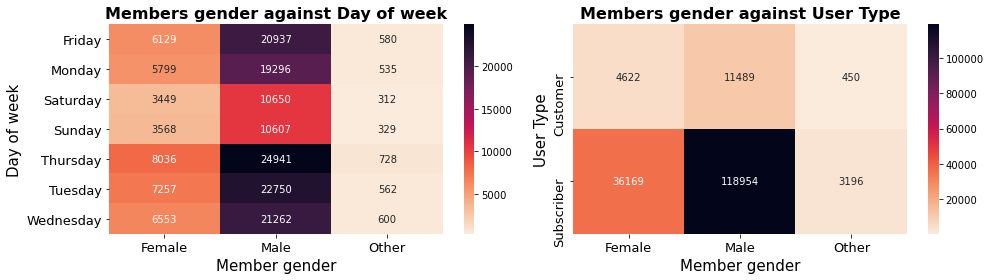

In [284]:
fig= plt.subplots(ncols = 1, nrows = 2 , figsize = [14,4])

plt.subplot(1, 2, 1)
ct_counts = sf_df.groupby(['member_gender','day_of_week']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'day_of_week', columns = 'member_gender', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd',cmap = sb.cm.rocket_r)
plt.ylabel('Day of week',fontsize=15)
plt.xlabel('Member gender',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Members gender against Day of week',fontsize=16, weight='bold')

plt.subplot(1, 2, 2)
u_counts = sf_df.groupby(['member_gender','user_type']).size()
u_counts = u_counts.reset_index(name='count')
u_counts = u_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')
sb.heatmap(u_counts, annot = True, fmt = 'd',cmap = sb.cm.rocket_r)
plt.ylabel('User Type',fontsize=15)
plt.xlabel('Member gender',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Members gender against User Type',fontsize=16, weight='bold')

plt.tight_layout();

### Is there specific Members gender who prefers certain Day of week , or  is registered as specific user type?
>#### It looks there is no special relation between gender with using bike at specific day of week or with the user type

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed from the previous plots that Users in average do not use bikes for long duration of time ,most of them do not exceed 1 hour , while the only users who tend to use bikes for longer periods are born between 1965 and 2000.

> While the count of records on Weekends are lower than other weekdays as mentioned before , the duration average is higher on Sunday and saturday than other days

> Although Subscriber users are the most users but they tend to use bikes on less durations about 10 minutes on average Customer users take the bikes for more than 20 minutes on average.

> While Males are the most users but they take the bikes for only 10 minutes on average , and females take a little longer but users who defined themselves as other use the bikes longer than 15 minutes on average.

> Users who prefer starting using Bikes on 3 and 2 am take longer durations than others.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> comparing Members gender with user type does not show special relation between them as Males are the majority of them both , and the same with genders and day of week Males and females prefer biking on Thursday and Tuesday

## Multivariate Exploration

> Now i want to extend my exploration for the relation between using duration and members birth year and if members gender is impacting the results

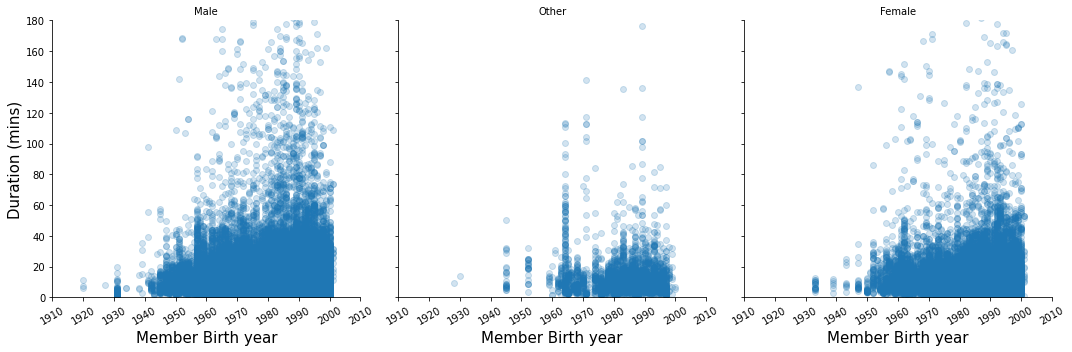

In [290]:
g=sb.FacetGrid(data=sf_df,col='member_gender',height=5)
g.map(plt.scatter,'member_birth_year','duration',alpha= 1/5)
g.set(ylim=(0,180))
g.set_xlabels('Member Birth year',fontsize=15)
g.set_ylabels('Duration (mins)',fontsize=15)
g.set_xticklabels(rotation=30)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout();


### does the users age impact their riding duration based on their gender ?
>####  Most Males born from 1940 to 2001 ride bikes less than 90 minutes with a peak at about 1932 Users who defined themselves as others are born from 1960 to 2000 and they use bikes for less than 40 minutes in most cases but some of them born near 1964 use bike for longer durations , while most of females born after 1950 use bikes for less than 60 minutes.

Finally i want to extend my exploration for the relation between using duration and day of week and difference between members gender using duration across the weekdays

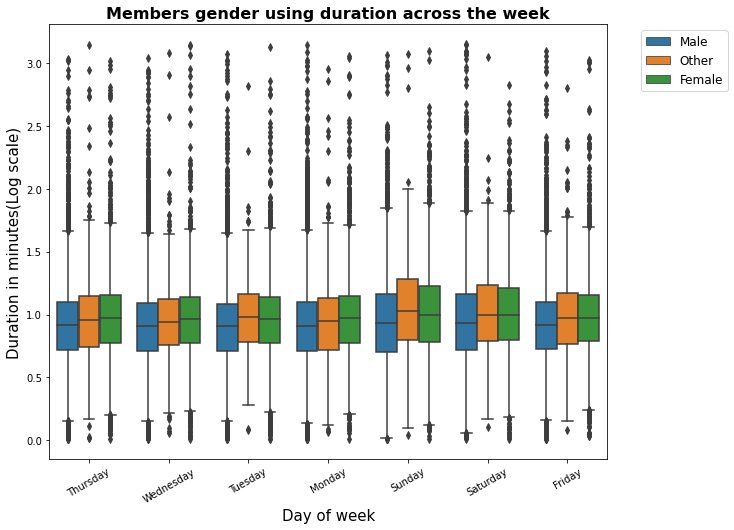

In [294]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
plt.figure(figsize = [10, 8])
sf_df['log_duration'] = sf_df['duration'].apply(log_trans)

sb.boxplot(data=sf_df , x='day_of_week',y='log_duration',hue='member_gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 12})
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Duration in minutes(Log scale)',fontsize=15)
plt.title('Members gender using duration across the week',fontsize=16, weight='bold')
plt.xticks(rotation=30);

### Is there a relation between bike riding duration and day of the week for each gender?
>#### Here we can see that Males use bikes for less time than Females on Monday , Thursday and Wednesday while Males uese bikes for longer periods on other weekdays , and finally Others use Bikes the fewest period of time

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of duration against members birth year by looking at the impact of each gender and the exploration showd that male users age range is bigger than female users and males use bikes for longer durations than females , while users of other gender have smaller age range and use bikes for shorter durations.

> Also The day of week has a relation with members gender as Males using duration are less than females on Monday , Thursday and Wednesday and more on other days.

### Were there any interesting or surprising interactions between features?

> Surprisingly i found out in the scatter plot that an observable number of male and female users born on 1930s are using bikes.